# BS2 : Demo Interactome

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import subprocess

import bs2_chap1 as c1
import bs2_chap2 as c2
import bs2_chap3_4_5 as c3

from utils import cd_to_parent_folder

cd_to_parent_folder()

def build_and_show_graph(int: c3.Interactome):
    """print graph from list

    Args:
        int (c3.Interactome): _description_
    """
    g_test = nx.Graph()
    for edge in int.int_list:
        g_test.add_edge(edge[0],edge[1])

    nx.draw(g_test, with_labels = True)
    plt.show()

## 1 - File verification and cleaning

In [24]:
print("Wrong interactome file")

with open("tests/test_files/empty_file.txt") as empty:
    a=empty.read()
print("' empty file '")
print(a)   
print(c1.is_interaction_file("tests/test_files/empty_file.txt"))

with open("tests/test_files/wrong_line_format.txt") as w_format:
    b=w_format.read()
    
print("\n"+b+"\n")
print(c1.is_interaction_file("tests/test_files/wrong_line_format.txt"))

with open("tests/test_files/wrong_line_count.txt") as w_count:
    c=w_count.read()
    
print("\n"+c+"\n")
print(c1.is_interaction_file("tests/test_files/wrong_line_count.txt"))

Wrong interactome file
' empty file '

(False, ValueError('Error: empty file'))

5
A,B
B C
C A
D A
C D

(False, ValueError('Error on format in line : A,B'))

4
A B
B C
C A
D A
C D

(False, ValueError('Wrong line number, 4 indicated for 5 line in total'))


In [25]:
print("Input file :")
with open("tests/test_files/test_clean_in.txt") as infile:
    print(infile.read())

c2.clean_interactome(filein="tests/test_files/test_clean_in.txt",
                     fileout="tests/test_files/test_clean_out.txt",)

print("\nOutput file")
with open("tests/test_files/test_clean_out.txt") as outfile:
    print(outfile.read())


Input file :
7
A B
B A
A A
B C
C A
D A
C D


Output file
5
A B
B C
C A
D A
C D



## 3 - Interactome - setup and utils

In [26]:
int = c3.Interactome("tests/test_files/demo_file.txt")

print(f"Protein of the list : {int.proteins}\n")
print(f"Graph as Dictionary : \n{int.int_dict}\n")
print(f"Graph as list : \n{int.int_list}\n")
print(f"Graph as matrix : \n")
for line in int.int_mat:
    print(line)
print("\n")

Protein of the list : ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']

Graph as Dictionary : 
{'A': ['B', 'C', 'D', 'E'], 'B': ['A', 'C', 'D', 'E'], 'C': ['A', 'B'], 'D': ['A', 'B', 'E'], 'E': ['A', 'B', 'D'], 'F': ['G', 'H', 'I'], 'G': ['F', 'H', 'I'], 'H': ['F', 'G'], 'I': ['G', 'F']}

Graph as list : 
[['A', 'B'], ['A', 'C'], ['A', 'D'], ['A', 'E'], ['B', 'C'], ['B', 'D'], ['B', 'E'], ['E', 'D'], ['F', 'G'], ['F', 'H'], ['H', 'G'], ['I', 'G'], ['I', 'F']]

Graph as matrix : 

[0, 1, 1, 1, 1, 0, 0, 0, 0]
[1, 0, 1, 1, 1, 0, 0, 0, 0]
[1, 1, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 0, 0, 1, 0, 0, 0, 0]
[1, 1, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 1, 1]
[0, 0, 0, 0, 0, 1, 0, 1, 1]
[0, 0, 0, 0, 0, 1, 1, 0, 0]
[0, 0, 0, 0, 0, 1, 1, 0, 0]




In [27]:
print(f'   {"  ".join(int.proteins)}')
for i,line in enumerate(int.int_mat):
    print(f"{int.proteins[i]} {line}")

   A  B  C  D  E  F  G  H  I
A [0, 1, 1, 1, 1, 0, 0, 0, 0]
B [1, 0, 1, 1, 1, 0, 0, 0, 0]
C [1, 1, 0, 0, 0, 0, 0, 0, 0]
D [1, 1, 0, 0, 1, 0, 0, 0, 0]
E [1, 1, 0, 1, 0, 0, 0, 0, 0]
F [0, 0, 0, 0, 0, 0, 1, 1, 1]
G [0, 0, 0, 0, 0, 1, 0, 1, 1]
H [0, 0, 0, 0, 0, 1, 1, 0, 0]
I [0, 0, 0, 0, 0, 1, 1, 0, 0]


number of vertices : 9
number of edges : 13
max degree : ['A', 'B']

histogram degree : 
2 : ***
3 : ****


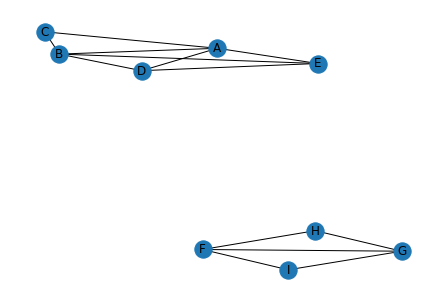

   A  B  C  D  E  F  G  H  I
A [0, 1, 1, 1, 1, 0, 0, 0, 0]
B [1, 0, 1, 1, 1, 0, 0, 0, 0]
C [1, 1, 0, 0, 0, 0, 0, 0, 0]
D [1, 1, 0, 0, 1, 0, 0, 0, 0]
E [1, 1, 0, 1, 0, 0, 0, 0, 0]
F [0, 0, 0, 0, 0, 0, 1, 1, 1]
G [0, 0, 0, 0, 0, 1, 0, 1, 1]
H [0, 0, 0, 0, 0, 1, 1, 0, 0]
I [0, 0, 0, 0, 0, 1, 1, 0, 0]


In [28]:
int = c3.Interactome("tests/test_files/demo_file.txt")

print(f"number of vertices : {int.count_vertices()}")
print(f"number of edges : {int.count_edges()}")
print(f"max degree : {int.get_max_degree()}")

print("\nhistogram degree : ")
int.histogram_degree(2,3)


build_and_show_graph(int=int)

print(f'   {"  ".join(int.proteins)}')
for i,line in enumerate(int.int_mat):
    print(f"{int.proteins[i]} {line}")


## 4 - Interactome - clustering

density : 0.3611111111111111
Local clustering for A: 0.6666666666666666


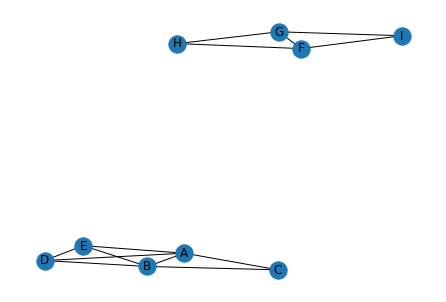

{'A': ['B', 'C', 'D', 'E'], 'B': ['A', 'C', 'D', 'E'], 'C': ['A', 'B'], 'D': ['A', 'B', 'E'], 'E': ['A', 'B', 'D'], 'F': ['G', 'H', 'I'], 'G': ['F', 'H', 'I'], 'H': ['F', 'G'], 'I': ['G', 'F']}

  [A, B, C, D, E, F, G, H, I]
A [0, 1, 1, 1, 1, 0, 0, 0, 0]
B [1, 0, 1, 1, 1, 0, 0, 0, 0]
C [1, 1, 0, 0, 0, 0, 0, 0, 0]
D [1, 1, 0, 0, 1, 0, 0, 0, 0]
E [1, 1, 0, 1, 0, 0, 0, 0, 0]
F [0, 0, 0, 0, 0, 0, 1, 1, 1]
G [0, 0, 0, 0, 0, 1, 0, 1, 1]
H [0, 0, 0, 0, 0, 1, 1, 0, 0]
I [0, 0, 0, 0, 0, 1, 1, 0, 0]


In [29]:
int = c3.Interactome("tests/test_files/demo_file.txt")

print(f"density : {int.density()}")
print(f"Local clustering for A: {int.clustering('A')}")

build_and_show_graph(int)

print(f"{int.int_dict}\n")

print(f'  [{", ".join(int.proteins)}]')
for i,line in enumerate(int.int_mat):
    print(f"{int.proteins[i]} {line}")

## 5 - Interactome - Erdös-Renyi

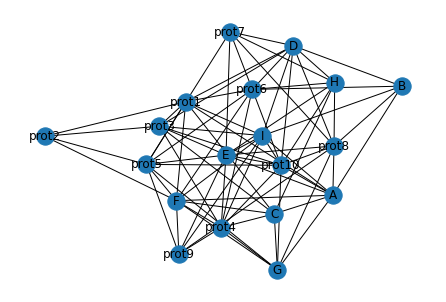


{'I': ['F', 'E', 'D', 'B', 'A', 'prot10', 'prot9', 'prot4', 'prot3', 'prot1'], 'F': ['I', 'G', 'C', 'A', 'prot9', 'prot6', 'prot5', 'prot4', 'prot2', 'prot1'], 'E': ['I', 'H', 'A', 'prot10', 'prot9', 'prot8', 'prot7', 'prot5', 'prot4', 'prot3'], 'D': ['I', 'H', 'B', 'prot10', 'prot8', 'prot7', 'prot6', 'prot3', 'prot1'], 'B': ['I', 'D', 'A', 'prot8', 'prot6'], 'A': ['I', 'G', 'F', 'E', 'C', 'B', 'prot10', 'prot8', 'prot1'], 'prot10': ['I', 'H', 'G', 'E', 'D', 'A', 'prot8', 'prot6', 'prot5', 'prot4', 'prot3'], 'prot9': ['I', 'F', 'E', 'prot8', 'prot5', 'prot4'], 'prot4': ['I', 'G', 'F', 'E', 'C', 'prot10', 'prot9', 'prot6', 'prot3'], 'prot3': ['I', 'E', 'D', 'C', 'prot10', 'prot4', 'prot2', 'prot1'], 'prot1': ['I', 'F', 'D', 'C', 'A', 'prot6', 'prot5', 'prot3', 'prot2'], 'H': ['E', 'D', 'C', 'prot10', 'prot8', 'prot7', 'prot6'], 'C': ['H', 'G', 'F', 'A', 'prot4', 'prot3', 'prot1'], 'prot8': ['H', 'G', 'E', 'D', 'B', 'A', 'prot10', 'prot9', 'prot7'], 'prot7': ['H', 'E', 'D', 'prot8', 'p

In [34]:
int = c3.Interactome("tests/test_files/demo_file.txt")
int.build_ER_random_graph(p=0.5,proteins=[f"prot{i}" for i in range(1,11)])
build_and_show_graph(int)

print(f"\n{int.int_dict}\n")
for line in int.int_mat:
    print(line)

In [35]:
int.histogram_degree(0,int.get_degree(int.get_max_degree()[0]))
print(f"number of vertices : {int.count_vertices()}")

0 : 
1 : 
2 : 
3 : 
4 : *
5 : *
6 : **
7 : ***
8 : *
9 : *******
10 : ***
11 : *
number of vertices : 9


## 6 - Interactome - Barabasi-Albert

{}


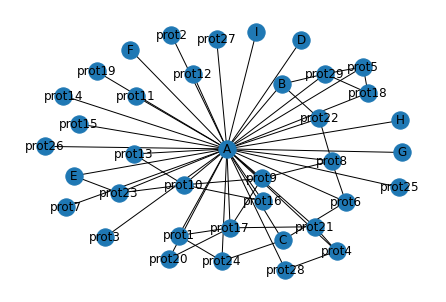

38
59

{'A': ['B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'prot1', 'prot2', 'prot3', 'prot4', 'prot5', 'prot6', 'prot7', 'prot8', 'prot9', 'prot10', 'prot11', 'prot12', 'prot13', 'prot14', 'prot15', 'prot16', 'prot17', 'prot18', 'prot19', 'prot20', 'prot21', 'prot22', 'prot23', 'prot24', 'prot25', 'prot26', 'prot27', 'prot28', 'prot29'], 'B': ['A', 'prot22', 'prot29'], 'C': ['A', 'prot6', 'prot24'], 'D': 'A', 'E': ['A', 'prot23'], 'F': 'A', 'G': 'A', 'H': 'A', 'I': 'A', 'prot1': ['A', 'prot17', 'prot24'], 'prot2': 'A', 'prot3': 'A', 'prot4': ['A', 'prot21', 'prot28'], 'prot5': ['A', 'prot18', 'prot29'], 'prot6': ['A', 'C', 'prot8'], 'prot7': 'A', 'prot8': ['A', 'prot6', 'prot9', 'prot22'], 'prot9': ['A', 'prot8', 'prot10', 'prot17'], 'prot10': ['A', 'prot9', 'prot13', 'prot16', 'prot23'], 'prot11': 'A', 'prot12': 'A', 'prot13': ['A', 'prot10'], 'prot14': 'A', 'prot15': 'A', 'prot16': ['A', 'prot10'], 'prot17': ['A', 'prot1', 'prot9', 'prot20', 'prot21'], 'prot18': ['A', 'prot5', 'prot29'],

In [9]:
int = c3.Interactome("tests/test_files/demo_file.txt")
int.build_BA_random_graph(proteins=[f"prot{i}" for i in range(1,30)])
build_and_show_graph(int)

print(int.count_vertices())
print(int.count_edges())
print(f"\n{int.int_dict}\n")
for line in int.int_mat:
    print(line)

In [4]:
int.histogram_degree(0,int.get_degree(int.get_max_degree()[0]))
print(f"number of vertices : {int.count_vertices()}")

0 : 
1 : **
2 : ****
3 : 
4 : 
5 : *********
6 : *
7 : 
8 : 
9 : *
number of vertices : 17


## 7 - Interactome - Connex component

Show connex components : 
5 A B C D E
4 F G H I
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
['1', '1', '1', '1', '1', '2', '2', '2', '2']


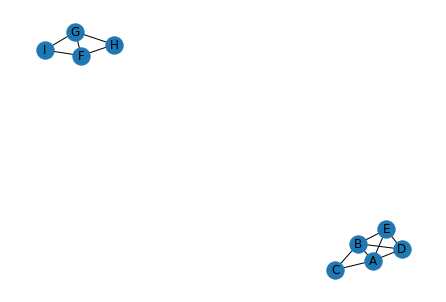

{'A': ['B', 'C', 'D', 'E'], 'B': ['A', 'C', 'D', 'E'], 'C': ['A', 'B'], 'D': ['A', 'B', 'E'], 'E': ['A', 'B', 'D'], 'F': ['G', 'H', 'I'], 'G': ['F', 'H', 'I'], 'H': ['F', 'G'], 'I': ['G', 'F']}
[0, 1, 1, 1, 1, 0, 0, 0, 0]
[1, 0, 1, 1, 1, 0, 0, 0, 0]
[1, 1, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 0, 0, 1, 0, 0, 0, 0]
[1, 1, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 1, 1]
[0, 0, 0, 0, 0, 1, 0, 1, 1]
[0, 0, 0, 0, 0, 1, 1, 0, 0]
[0, 0, 0, 0, 0, 1, 1, 0, 0]


In [44]:
int = c3.Interactome("tests/test_files/demo_file.txt")
print("Show connex components : ")
int.count_CC()
print(int.proteins)
print(int.compute_CC())

build_and_show_graph(int)

print(int.int_dict)
for line in int.int_mat:
    print(line)

## 8 - Tests

In [45]:
bashCommand = "make tests"
process = subprocess.Popen(bashCommand.split(), stdout=subprocess.PIPE)
out,err = process.communicate()

..............
----------------------------------------------------------------------
Ran 14 tests in 0.002s

OK
.......
----------------------------------------------------------------------
Ran 7 tests in 0.002s

OK
..........
----------------------------------------------------------------------
Ran 10 tests in 0.005s

OK
.
----------------------------------------------------------------------
Ran 1 test in 0.000s

OK
...
----------------------------------------------------------------------
Ran 3 tests in 0.004s

OK
